Pretrained HugginFace
https://huggingface.co/docs/diffusers/main/en/api/diffusion_pipeline

In [1]:
!pip install transformers # really needed!
!pip install diffusers 
!pip install accelerate # recommended

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 19.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 KB 7.9 MB/s eta 0:00:00


Model list: https://huggingface.co/models?sort=downloads&search=diffusion

In [3]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("CompVis/ldm-text2im-large-256")

Downloading:   0%|          | 0.00/376 [00:00<?, ?B/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/662 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/713 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.49G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/522 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
The config attributes {'timestep_values': None} were passed to DDIMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [4]:
from diffusers import LMSDiscreteScheduler

scheduler = LMSDiscreteScheduler.from_config(pipeline.scheduler.config)

pipeline.scheduler = scheduler
pipeline.to("cuda")

The config attributes {'timestep_values': None} were passed to LMSDiscreteScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [6]:
import torch 


dummy_input = torch.randn(1,3,32,32)
out = pipeline("brown dog")
print(out.shape)

  0%|          | 0/50 [00:00<?, ?it/s]

AttributeError: ignored

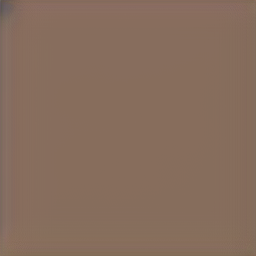

In [10]:
out.images[0].size # pillow
display(out.images[0])

Train on custom data

https://github.com/lucidrains/denoising-diffusion-pytorch